In [1]:
import pandas as pd
import numpy as np
import json

from app_store_scraper import AppStore
getgo = AppStore(country='sg', app_name='getgo', app_id = '1545316216')

getgo.review(how_many=2000)

2023-02-24 23:50:13,732 [INFO] Base - Initialised: AppStore('sg', 'getgo', 1545316216)
2023-02-24 23:50:13,732 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/sg/app/getgo/id1545316216
2023-02-24 23:50:18,869 [INFO] Base - [id:1545316216] Fetched 460 reviews (460 fetched in total)
2023-02-24 23:50:20,659 [INFO] Base - [id:1545316216] Fetched 616 reviews (616 fetched in total)


In [2]:
getgo.reviews[:10]

[{'date': datetime.datetime(2021, 10, 29, 2, 42, 14),
  'developerResponse': {'id': 26048957,
   'body': "Hey Gracias, thank you for your review! We really appreciate your support and we are so glad you are enjoying our service. 😊 We will definitely take note of your feedback and take it into consideration as we continue to improve on our service! We can't wait to see you continue to enjoy the #FreedomToDrive with us. 🥰\n\nCheers, Natalie",
   'modified': '2021-11-03T06:03:49Z'},
  'review': 'Good point A to point A rental service with no membership fees! The app interface is very intuitive and easy to use although there are some issues connecting to the car to unlock them at times depending on the connection. \n\nAlso, because the rental return is based on the app, essential to make sure your phone as enough battery. The fleets are well maintained, clean and available at many convenient locations. Save $, Don’t need to buy car. :)\n\nSome areas to improve on will be the chat function 

In [3]:
getgodf = pd.DataFrame(np.array(getgo.reviews),columns=['review'])
getgodf2 = getgodf.join(pd.DataFrame(getgodf.pop('review').tolist()))
getgodf2.head()

,date,developerResponse,review,rating,isEdited,title,userName
0,2021-10-29 02:42:14,"{'id': 26048957, 'body': 'Hey Gracias, thank y...",Good point A to point A rental service with no...,4,False,"Convenient rental service, Easy to use app int...",Gracias.i.m
1,2022-01-28 07:52:22,"{'id': 27222908, 'body': 'Hey Vishal, thanks f...",Today booked Ssangyong XLV with GetGo Carshari...,5,True,Need to Access current Booking via Offline (To...,Vishal C B
2,2021-12-04 02:47:08,"{'id': 26796019, 'body': 'Hey Lexus, thank you...",GetGO had a strong community at a certain plat...,5,False,it’s nothing but a PERFECT APP,Lexus Guo
3,2021-12-08 02:23:32,"{'id': 26796398, 'body': 'Hey gogetclean, than...",Hi i would like to reflect on the cleanliness ...,5,False,Responsibility of hirer.,gogetclean
4,2023-02-22 15:45:44,"{'id': 35044471, 'body': 'Hi there, thank you ...",Two times I encountered the app jammed while o...,3,False,APP SOMETIMES HAVE ISSUES,GETGO USER


In [4]:
getgodf2.to_csv("getgo.csv")  

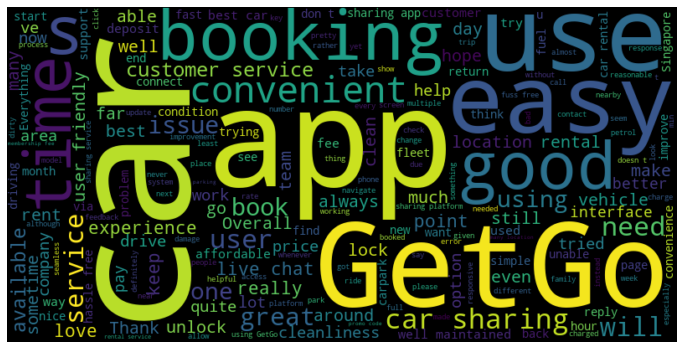

In [5]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


# create a word cloud from the review column
text = ' '.join(getgodf2['review'].astype(str))
wordcloud = WordCloud(width=800, height=400, stopwords=STOPWORDS).generate(text)

# plot the word cloud
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [6]:
wordcloud.to_file('wordcloudreview.png')

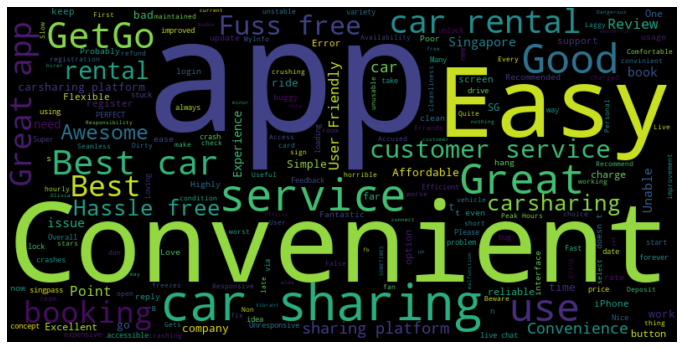

In [7]:
# create a word cloud from the review column
text = ' '.join(getgodf2['title'].astype(str))
wordcloud = WordCloud(width=800, height=400, stopwords=STOPWORDS).generate(text)

# plot the word cloud
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [8]:
wordcloud.to_file('wordcloudtitle.png')

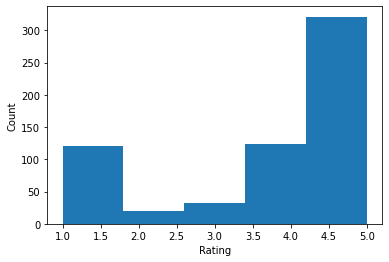

In [9]:

# create a histogram of the rating column
plt.hist(getgodf2['rating'], bins=5)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


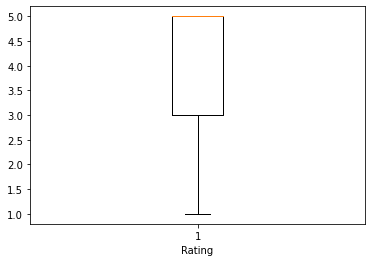

In [10]:


# create a box plot of the rating column
plt.boxplot(getgodf2['rating'])
plt.xlabel('Rating')
plt.show()

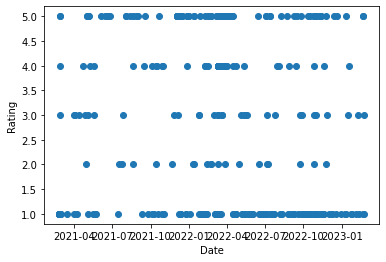

In [11]:


# convert the date column to a datetime format
getgodf2['date'] = pd.to_datetime(getgodf2['date'], format='%Y-%m-%d %H:%M:%S')

# create a scatter plot of rating vs date
plt.scatter(getgodf2['date'], getgodf2['rating'])
plt.xlabel('Date')
plt.ylabel('Rating')
plt.show()


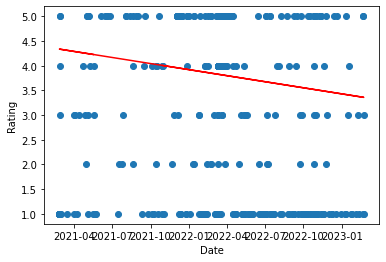

In [12]:
from scipy import stats

# create a scatter plot of rating vs date
plt.scatter(getgodf2['date'], getgodf2['rating'])

# add a linear trendline to the scatter plot
slope, intercept, r_value, p_value, std_err = stats.linregress(getgodf2['date'].astype(int), getgodf2['rating'])
line = slope*getgodf2['date'].astype(int) + intercept
plt.plot(getgodf2['date'], line, color='red')

plt.xlabel('Date')
plt.ylabel('Rating')
plt.show()

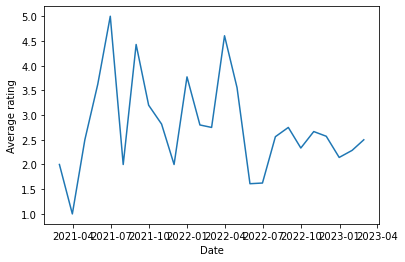

In [13]:

# group the data by month and calculate the mean rating
df_monthly = getgodf2.groupby(pd.Grouper(key='date', freq='M'))['rating'].mean().reset_index()

# create a line chart of the monthly average rating
plt.plot(df_monthly['date'], df_monthly['rating'])
plt.xlabel('Date')
plt.ylabel('Average rating')
plt.show()


In [14]:
# select the rows where the rating is 1
df_rating_1 = getgodf2[getgodf2['rating'] == 1]

df_rating_1.head(10)

,date,developerResponse,review,rating,isEdited,title,userName
9,2022-11-18 13:46:31,NaN,I faced the exact same issue as a previous rev...,1,False,Accused of False Charges,lingz99
18,2022-04-18 21:53:38,NaN,"If you are a thrill seeker and like surprises,...",1,False,Affordable yet Dangerous Car Rental Service,DYLove88
36,2022-02-04 10:34:48,"{'id': 27916461, 'body': 'Hey Gary, thanks for...","App crashes with errors, no way around but rei...",1,False,"App crashes - need reinstall. Real Car broken,...",Gary Tay
38,2022-02-13 10:40:27,"{'id': 28253932, 'body': 'Hey Enzaiizi, we're ...",I booked for an hour but I didn’t turn up to u...,1,False,Over deduct,Enzaiizi
39,2023-01-08 07:39:14,"{'id': 34924803, 'body': 'Hi there, thank you ...",Very poor and disappointing customer service o...,1,False,POOR customer service!,Dsunyo
58,2022-12-31 03:24:58,"{'id': 34925357, 'body': 'Hi there, thank you ...",Great idea - fantastic for the sharing economy...,1,False,Great idea - horrible execution; feedback from...,unhappy comfort cab user
62,2022-04-23 15:51:48,"{'id': 29699787, 'body': 'Hey Hsiao Seong, tha...","Having a car booked, system or admin doesn’t i...",1,False,First time user,Hsiao Seong
83,2023-01-26 00:30:12,"{'id': 34924526, 'body': 'Hi there, thank you ...",Don't forgo your car for community ones just y...,1,False,"Great idea, bad reality, kinda sad",SGCL123
87,2022-04-15 22:42:07,NaN,This is my first time using this service and i...,1,False,Leave cash card and cannot be found,acefun1293
112,2022-07-15 14:05:17,NaN,Whenever I launched the app or tap anywhere it...,1,False,App unusable at all,Goodbyegmailapp


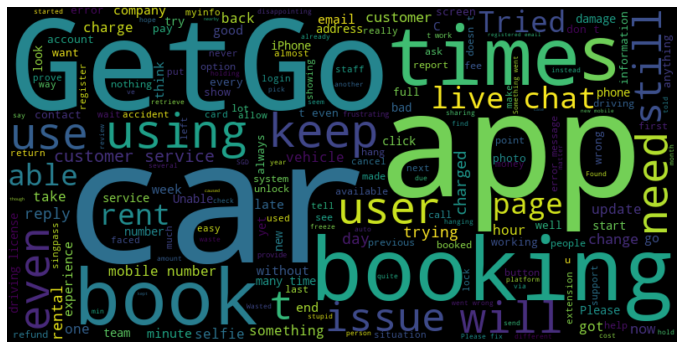

In [15]:
# create a word cloud from the review column
text = ' '.join(df_rating_1['review'].astype(str))
wordcloud = WordCloud(width=800, height=400, stopwords=STOPWORDS).generate(text)

# plot the word cloud
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
wordcloud.to_file('wordcloudrating1.png')

In [17]:
df_monthly

,date,rating
0,2021-02-28,2.000000
1,2021-03-31,1.000000
2,2021-04-30,2.500000
3,2021-05-31,3.625000
4,2021-06-30,5.000000
5,2021-07-31,2.000000
6,2021-08-31,4.428571
7,2021-09-30,3.200000
8,2021-10-31,2.818182
9,2021-11-30,2.000000


In [18]:
from statsmodels.tsa.arima.model import ARIMA

# fit an ARIMA model to the average rating per month
model = ARIMA(df_monthly['rating'], order=(1,1,1))
model_fit = model.fit()

# use the model to make a one-step forecast for the next month
forecast = model_fit.forecast()

# print the forecasted average rating for the next month
print(forecast)


25    2.706629
dtype: float64


In [19]:
df_rating_1

,date,developerResponse,review,rating,isEdited,title,userName
9,2022-11-18 13:46:31,NaN,I faced the exact same issue as a previous rev...,1,False,Accused of False Charges,lingz99
18,2022-04-18 21:53:38,NaN,"If you are a thrill seeker and like surprises,...",1,False,Affordable yet Dangerous Car Rental Service,DYLove88
36,2022-02-04 10:34:48,"{'id': 27916461, 'body': 'Hey Gary, thanks for...","App crashes with errors, no way around but rei...",1,False,"App crashes - need reinstall. Real Car broken,...",Gary Tay
38,2022-02-13 10:40:27,"{'id': 28253932, 'body': 'Hey Enzaiizi, we're ...",I booked for an hour but I didn’t turn up to u...,1,False,Over deduct,Enzaiizi
39,2023-01-08 07:39:14,"{'id': 34924803, 'body': 'Hi there, thank you ...",Very poor and disappointing customer service o...,1,False,POOR customer service!,Dsunyo
...,...,...,...,...,...,...,...
598,2023-02-03 04:22:54,"{'id': 34547886, 'body': 'Hello Kiyagami. Than...","*03/02/2023*\n\nHello, change of phone number ...",1,True,Beware of GetGo’s PDPA Exploitation,Kiyagami
599,2022-11-11 08:40:14,"{'id': 34959264, 'body': 'Hi there, thank you ...",I was faced with multiple issues with the car ...,1,False,Horrendous CS support,qwercarneg
606,2022-03-17 09:29:12,"{'id': 28712062, 'body': 'Hey Ifan, we're so s...",I made a booking and the car was returned at t...,1,False,Don’t trust this company!,Ifan.Z
614,2021-11-01 04:17:07,"{'id': 26048867, 'body': 'Hey Ohhl, we're so s...",Got the car and the interior smells like a mix...,1,False,No Live Support & Poor Cars,Ohhl


In [20]:
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from gensim import corpora, models


# Define stopwords and other preprocessing steps
stop_words = set(stopwords.words('english'))
def preprocess(text):
    text = re.sub('[^a-zA-Z]', ' ', text)  # remove non-alphabetic characters
    words = text.lower().split()  # convert to lowercase and split into words
    words = [w for w in words if w not in stop_words]  # remove stopwords
    return words

# Apply preprocessing to reviews
doc_clean = [preprocess(doc) for doc in df_rating_1['review']]

# Create dictionary and corpus
dictionary = corpora.Dictionary(doc_clean)
corpus = [dictionary.doc2bow(doc) for doc in doc_clean]

# Perform LDA topic modeling
num_topics = 5  # number of topics to generate
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Print topics and their most frequent words
for i, topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=10):
    print(f'Topic {i}: {topic}')


2023-02-24 23:50:49,010 [INFO] summarizer.preprocessing.cleaner - 'pattern' package not found; tag filters are not available for English
2023-02-24 23:50:49,040 [INFO] gensim.corpora.dictionary - adding document #0 to Dictionary(0 unique tokens: [])
2023-02-24 23:50:49,048 [INFO] gensim.corpora.dictionary - built Dictionary(1139 unique tokens: ['absolute', 'accused', 'alleged', 'booked', 'c']...) from 120 documents (total 3027 corpus positions)
2023-02-24 23:50:49,052 [INFO] gensim.models.ldamodel - using symmetric alpha at 0.2
2023-02-24 23:50:49,053 [INFO] gensim.models.ldamodel - using symmetric eta at 0.2
2023-02-24 23:50:49,055 [INFO] gensim.models.ldamodel - using serial LDA version on this node
2023-02-24 23:50:49,070 [INFO] gensim.models.ldamodel - running online (multi-pass) LDA training, 5 topics, 10 passes over the supplied corpus of 120 documents, updating model once every 120 documents, evaluating perplexity every 120 documents, iterating 50x with a convergence threshold o

2023-02-24 23:50:49,689 [INFO] gensim.models.ldamodel - topic #4 (0.200): 0.023*"getgo" + 0.022*"car" + 0.016*"number" + 0.011*"driving" + 0.010*"change" + 0.010*"mobile" + 0.009*"app" + 0.008*"book" + 0.008*"customer" + 0.007*"address"
2023-02-24 23:50:49,690 [INFO] gensim.models.ldamodel - topic diff=0.113421, rho=0.408248
2023-02-24 23:50:49,750 [INFO] gensim.models.ldamodel - -6.987 per-word bound, 126.8 perplexity estimate based on a held-out corpus of 120 documents with 3027 words
2023-02-24 23:50:49,751 [INFO] gensim.models.ldamodel - PROGRESS: pass 5, at document #120/120
2023-02-24 23:50:49,786 [INFO] gensim.models.ldamodel - topic #0 (0.200): 0.014*"app" + 0.013*"car" + 0.012*"book" + 0.010*"work" + 0.010*"click" + 0.008*"getgo" + 0.008*"keep" + 0.008*"charges" + 0.008*"requirement" + 0.007*"booking"
2023-02-24 23:50:49,787 [INFO] gensim.models.ldamodel - topic #1 (0.200): 0.019*"getgo" + 0.017*"car" + 0.014*"app" + 0.012*"time" + 0.009*"tried" + 0.008*"using" + 0.008*"user" 

Topic 0: 0.014*"app" + 0.013*"car" + 0.012*"book" + 0.011*"work" + 0.010*"click" + 0.009*"keep" + 0.008*"getgo" + 0.008*"charges" + 0.008*"requirement" + 0.007*"booking"
Topic 1: 0.020*"getgo" + 0.017*"car" + 0.014*"app" + 0.011*"time" + 0.009*"tried" + 0.008*"using" + 0.008*"trying" + 0.008*"user" + 0.007*"use" + 0.006*"chat"
Topic 2: 0.027*"app" + 0.023*"car" + 0.018*"booking" + 0.010*"even" + 0.010*"service" + 0.009*"using" + 0.008*"book" + 0.008*"customer" + 0.007*"wrong" + 0.007*"getgo"
Topic 3: 0.030*"car" + 0.021*"app" + 0.012*"time" + 0.010*"reply" + 0.010*"cars" + 0.009*"something" + 0.009*"able" + 0.009*"need" + 0.009*"get" + 0.009*"late"
Topic 4: 0.024*"getgo" + 0.022*"car" + 0.016*"number" + 0.011*"driving" + 0.010*"change" + 0.010*"mobile" + 0.008*"app" + 0.008*"customer" + 0.008*"new" + 0.008*"selfie"


In [21]:

# count the number of reviews and responses
num_reviews = len(getgodf2)
num_responses = len(getgodf2.dropna(subset=['developerResponse']))

# calculate the rate of response
response_rate = num_responses / num_reviews

# print the response rate
print(f'The response rate is {response_rate:.2%}')


The response rate is 49.68%


In [22]:
# count the number of reviews and responses for rating 1
num_reviews = len(df_rating_1)
num_responses = len(df_rating_1.dropna(subset=['developerResponse']))

# calculate the rate of response
response_rate = num_responses / num_reviews

# print the response rate
print(f'The response rate is {response_rate:.2%}')

The response rate is 61.67%


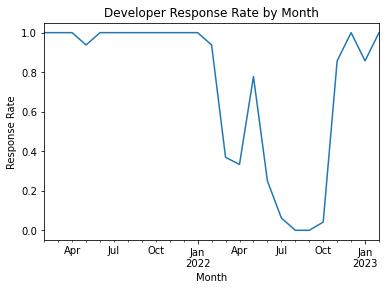

In [23]:
# Convert the date column to a datetime object
getgodf2['date'] = pd.to_datetime(getgodf2['date'])

# Group the dataframe by month and count the number of responses
responses_per_month = getgodf2.groupby(pd.Grouper(key='date', freq='M'))['developerResponse'].count()

# Group the dataframe by month and count the total number of reviews
total_reviews_per_month = getgodf2.groupby(pd.Grouper(key='date', freq='M'))['review'].count()

# Calculate the response rate for each month
response_rate = responses_per_month / total_reviews_per_month

# Plot the response rate over time
response_rate.plot(kind='line')

# Add labels and title to the plot
plt.xlabel('Month')
plt.ylabel('Response Rate')
plt.title('Developer Response Rate by Month')
plt.show()

In [24]:
# Filter for the relevant time period
start_date = '2022-07-01'
end_date = '2022-10-31'
mask = (getgodf2['date'] >= start_date) & (getgodf2['date'] <= end_date)
getgodf_filtered = getgodf2.loc[mask]

# Count the number of responses and reviews
num_responses = getgodf_filtered['developerResponse'].count()
num_reviews = getgodf_filtered['review'].count()

print(f"Number of responses: {num_responses}")
print(f"Number of reviews: {num_reviews}")


Number of responses: 2
Number of reviews: 61


In [25]:
getgodf_filtered

,date,developerResponse,review,rating,isEdited,title,userName
23,2022-09-24 07:18:09,NaN,"Had been using GetGo for a while, generally qu...",3,False,Apps Problem while Booking,laoyeh
24,2022-07-07 11:19:03,NaN,The app wont let me press book now upon select...,3,False,App is buggy,Faqihsabri
40,2022-08-03 14:33:27,NaN,"Easy to use the app, convenient to get around....",4,False,Convenient and easy to book,Vivianti
53,2022-10-28 01:41:53,NaN,"Mostly car are clean, No slight damages on the...",5,False,Convienient & Hassle Free,NoiNordin
61,2022-07-02 23:28:59,NaN,Have been a getgo user for awhile and i must a...,5,False,App,Fxrxd
...,...,...,...,...,...,...,...
573,2022-08-06 14:15:27,NaN,Is this app still working?,1,False,I can’t log in,Lamchi
586,2022-09-29 00:49:35,NaN,App keep prompting error and intermittently cr...,1,False,App unstable,menikmatik
590,2022-10-28 12:25:18,NaN,After newest update. Cant even use on ios 16.1..,1,False,The F bro?,Azdtroyyy
597,2022-10-04 10:26:02,NaN,Bad,1,False,Buggy app,Amos ouch


In [26]:

# Set the frequency of the time periods
freq = '4M'

# Group by time period and calculate the mean of the review count
avg_reviews_per_period = getgodf2.groupby(pd.Grouper(key='date', freq=freq))['review'].count().mean()

print(f"Average number of reviews left in a {freq} period: {avg_reviews_per_period:.2f}")


Average number of reviews left in a 4M period: 88.00


In [27]:
# Set the maximum width of column content to a large number
pd.set_option('display.max_colwidth', None)

# Display the DataFrame
print(getgodf_filtered)

                   date developerResponse  \
23  2022-09-24 07:18:09               NaN   
24  2022-07-07 11:19:03               NaN   
40  2022-08-03 14:33:27               NaN   
53  2022-10-28 01:41:53               NaN   
61  2022-07-02 23:28:59               NaN   
..                  ...               ...   
573 2022-08-06 14:15:27               NaN   
586 2022-09-29 00:49:35               NaN   
590 2022-10-28 12:25:18               NaN   
597 2022-10-04 10:26:02               NaN   
601 2022-10-27 12:39:41               NaN   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [30]:
import nltk
nltk.download('punkt')

# Remove rows with missing values
getgodf2 = getgodf2.dropna(subset=['review', 'developerResponse'])

# Tokenize the reviews
getgodf2['review_tokenized'] = getgodf2['review'].apply(nltk.word_tokenize)

# Train a language model using NLTK
text = ' '.join([dev_resp['body'] for dev_resp in getgodf2['developerResponse'].tolist() if isinstance(dev_resp, dict)])
tokens = nltk.word_tokenize(text)
ngrams = list(nltk.ngrams(tokens, 3))
lm = nltk.ConditionalFreqDist((n[:-1], n[-1]) for n in ngrams)

# Generate responses for reviews without a developer response
def generate_response(review):
    if pd.isnull(review['developerResponse']):
        review_tokens = nltk.word_tokenize(review['review'])
        seed = tuple(review_tokens[-3:])
        generated_tokens = []
        for i in range(30):
            next_word = lm[seed].max()
            generated_tokens.append(next_word)
            seed = seed[1:] + (next_word,)
        return ' '.join(generated_tokens)
    else:
        return review['developerResponse']['body']

# Apply the function to the dataframe
getgodf2['generatedResponse'] = getgodf2.apply(generate_response, axis=1)


[nltk_data] Downloading package punkt to /Users/zwt2000/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [32]:
getgodf2['generatedResponse']

0                                                                                                          Hey Gracias, thank you for your review! We really appreciate your support and we are so glad you are enjoying our service. 😊 We will definitely take note of your feedback and take it into consideration as we continue to improve on our service! We can't wait to see you continue to enjoy the #FreedomToDrive with us. 🥰\n\nCheers, Natalie
1                                                                                                                                                                                                                               Hey Vishal, thanks for leaving us a review! We'll definitely take note of your feedback and work on improving our service to bring you a better GetGo experience. Hope you continue to enjoy the #FreedomToDrive with us! 🙌
2                                                                                                               